# 0. Import Libraries

In [1]:
import numpy as np
import pandas as pd

# 1. 데이터적재
## sepal, petal

In [2]:
from sklearn.datasets import load_iris
iris_dataset=load_iris()

In [3]:
print "iris_dataset size:\n", iris_dataset.keys()

iris_dataset size:
['target', 'DESCR', 'target_names', 'feature_names', 'data', 'filename']


In [5]:
print iris_dataset['DESCR'][:193]+"\n..."

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [7]:
print "name of target:", iris_dataset['target_names']
print "name of feature:", iris_dataset['feature_names']
print "type of data:", type(iris_dataset['data'])
print "shape of data", iris_dataset['data'].shape
print "first five rows of data\n", iris_dataset['data'][:5]
print "type of target", type(iris_dataset['target'])
print "size of target:", iris_dataset['target'].shape
print "target:", iris_dataset['target']

name of target: ['setosa' 'versicolor' 'virginica']
name of feature: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
type of data: <type 'numpy.ndarray'>
shape of data (150, 4)
first five rows of data
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
type of target <type 'numpy.ndarray'>
size of target: (150,)
target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 2. Evaluation for performance: Train & Test data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

In [11]:
print "size of X_train:",X_train.shape
print "size of y_train:",y_train.shape

size of X_train: (112, 4)
size of y_train: (112,)


# 3. Let's look around iris data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f121c46c2d0>,
      dtype=object)

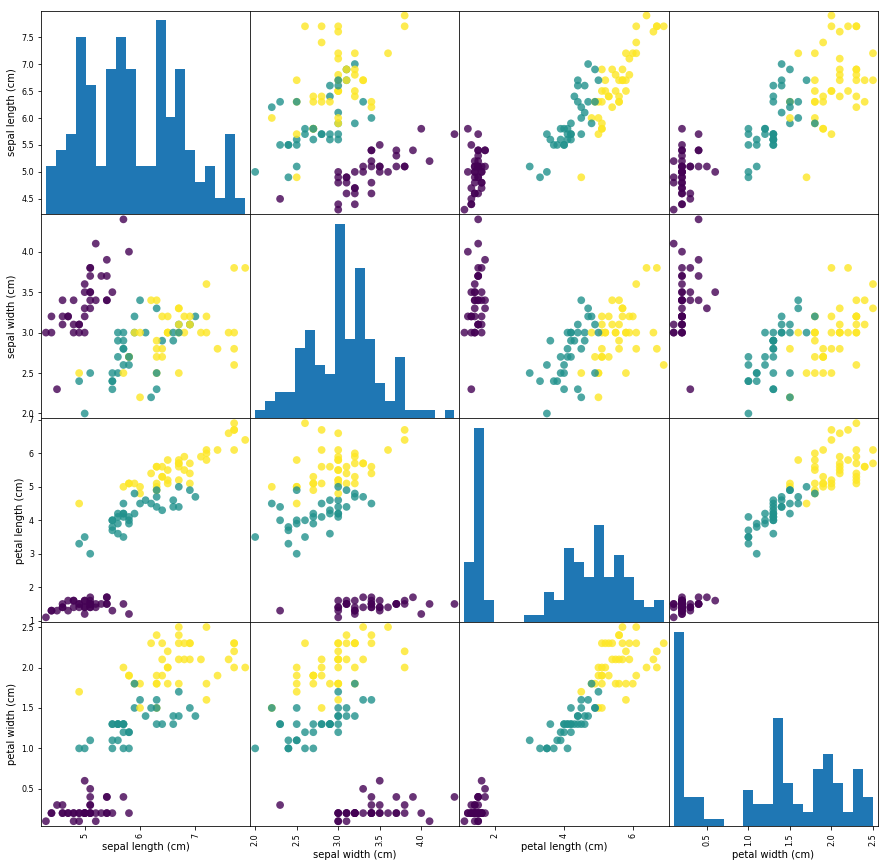

In [19]:
iris_dataframe=pd.DataFrame(X_train,columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15),marker='o',
                           hist_kwds={'bins':20},s=60,alpha=.8)

# 4. K-NN algorithm

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# 5. Prediction

In [25]:
X_new=np.array([[4,2.9,1,0.2]])
print "X_new.shape:", X_new.shape

X_new.shape: (1, 4)


In [26]:
prediction=knn.predict(X_new)
print "prediction:", prediction
print "predicted target name:",iris_dataset['target_names'][prediction]

prediction: [0]
predicted target name: ['setosa']


# 6. Performance

In [27]:
y_pred=knn.predict(X_test)
print "predicted test dataset:\n", y_pred

predicted test dataset:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [28]:
print "accuracy for test set:{:.2f}".format(np.mean(y_pred==y_test))

accuracy for test set:0.97
